## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [6]:
data = pd.read_csv('../data/raw/upi_fraud_dataset_raw.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   UserID                10000 non-null  object 
 2   Amount                10000 non-null  float64
 3   Timestamp             10000 non-null  object 
 4   MerchantCategory      10000 non-null  object 
 5   TransactionType       10000 non-null  object 
 6   DeviceID              10000 non-null  object 
 7   IPAddress             10000 non-null  object 
 8   Latitude              10000 non-null  float64
 9   Longitude             10000 non-null  float64
 10  AvgTransactionAmount  10000 non-null  float64
 11  TransactionFrequency  10000 non-null  object 
 12  UnusualLocation       10000 non-null  bool   
 13  UnusualAmount         10000 non-null  bool   
 14  NewDevice             10000 non-null  bool   
 15  FailedAttempts      

## Check for Missing Values

In [7]:
print(data.isnull().sum())

TransactionID           0
UserID                  0
Amount                  0
Timestamp               0
MerchantCategory        0
TransactionType         0
DeviceID                0
IPAddress               0
Latitude                0
Longitude               0
AvgTransactionAmount    0
TransactionFrequency    0
UnusualLocation         0
UnusualAmount           0
NewDevice               0
FailedAttempts          0
FraudFlag               0
PhoneNumber             0
BankName                0
dtype: int64


## Summary statistics for numerical features

In [8]:
print(data.describe())

       TransactionID         Amount      Latitude     Longitude  \
count   1.000000e+04   10000.000000  10000.000000  10000.000000   
mean    5.515428e+11    5037.460596      0.117162      0.168406   
std     2.595428e+11    4412.785517     52.080902    104.868717   
min     1.000276e+11       2.200000    -89.981366   -179.997289   
25%     3.269720e+11    2526.945000    -45.123437    -90.746018   
50%     5.527816e+11    4951.010000      0.502523      0.373569   
75%     7.787159e+11    7528.650000     45.606327     91.905884   
max     9.997475e+11  339268.000000     89.976634    179.971566   

       AvgTransactionAmount  FailedAttempts   PhoneNumber  
count          10000.000000    10000.000000  1.000000e+04  
mean            4988.532019        2.012600  3.085201e+11  
std             2887.007255        1.416913  4.290684e+11  
min                1.550000        0.000000  1.593770e+05  
25%             2497.180000        1.000000  3.809523e+09  
50%             4947.515000        2

## Distribution of the target variable (FraudFlag)


Distribution of FraudFlag:
FraudFlag
False    9035
True      965
Name: count, dtype: int64


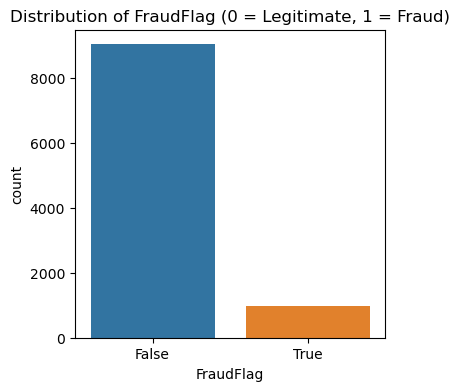

In [9]:
if 'FraudFlag' in data.columns:
    print("\nDistribution of FraudFlag:")
    print(data['FraudFlag'].value_counts())

    plt.figure(figsize=(4, 4))
    sns.countplot(x='FraudFlag', data=data)
    plt.title('Distribution of FraudFlag (0 = Legitimate, 1 = Fraud)')
    plt.show()

## Correlation matrix for numerical features

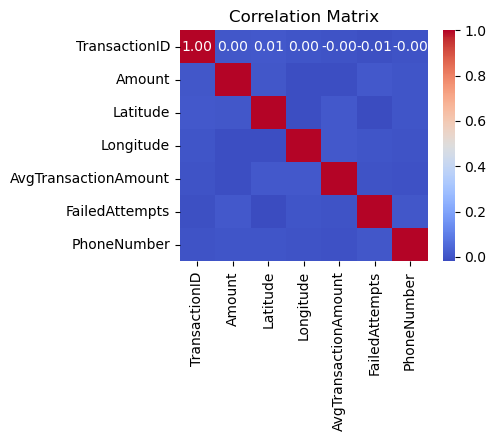

In [10]:
numerical_features = data.select_dtypes(include=[np.number]).columns
if len(numerical_features) > 1:
    plt.figure(figsize=(4, 3))
    corr_matrix = data[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

## Distribution of transaction amounts

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


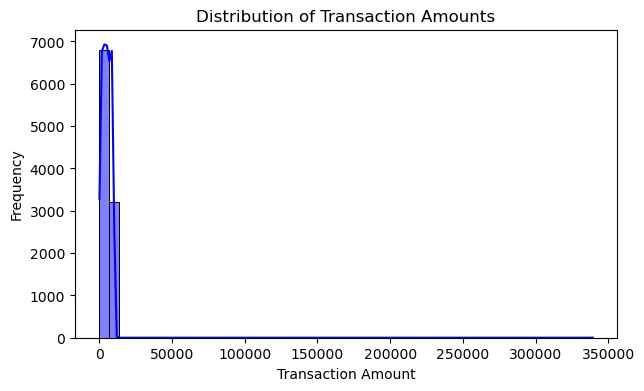

In [11]:
plt.figure(figsize=(7, 4))
sns.histplot(data["Amount"], bins=50, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

## Outlier Detection in Transaction

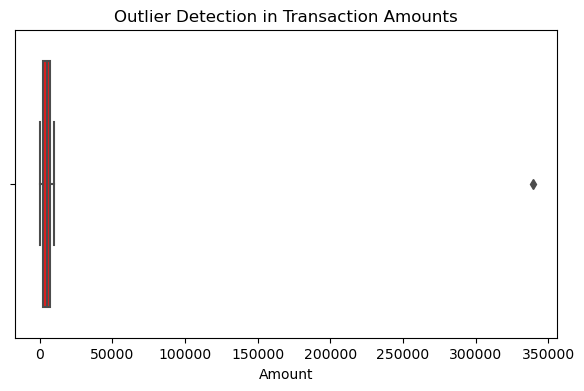

In [12]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=data["Amount"], color="red")
plt.title("Outlier Detection in Transaction Amounts")
plt.show()

## Count of transactions by TransactionType

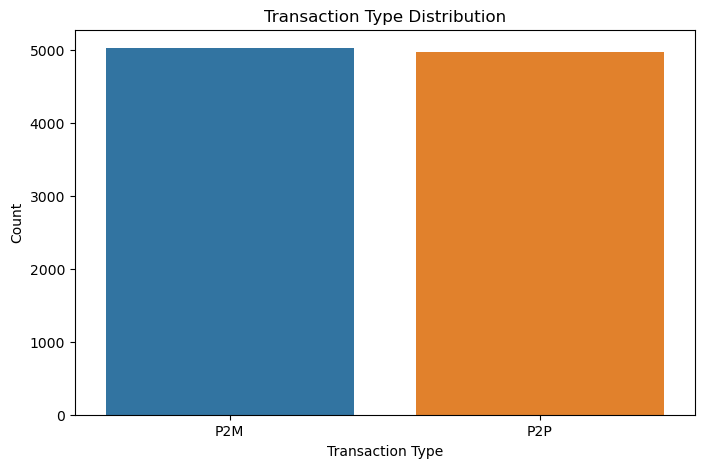

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x="TransactionType", data=data)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

## Count of transactions by MerchantCategory

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

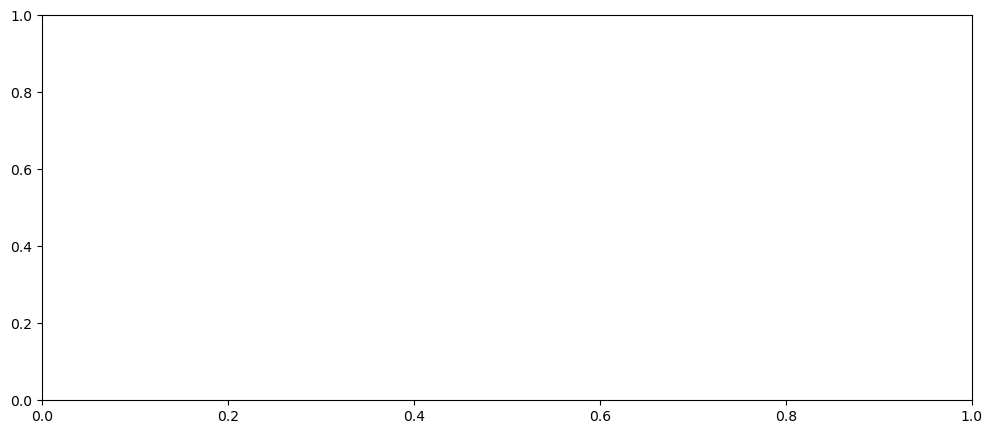

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(
    y="MerchantCategory",
    data=data,
    order=data["MerchantCategory"].value_counts().index,
    hue="MerchantCategory",
    palette="viridis",
    legend=False
)
plt.title("Transactions by Merchant Category")
plt.xlabel("Count")
plt.ylabel("Merchant Category")
plt.show()


## Distribution of transactions over time

In [ ]:
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data['Hour'] = data['Timestamp'].dt.hour
    data['DayOfWeek'] = data['Timestamp'].dt.day_name()

    # Transactions by hour
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Hour', hue='Hour', data=data, palette='Set3', legend=False)
    plt.title('Transactions by Hour of the Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.show()

    # Transactions by day of the week
    plt.figure(figsize=(7, 4))
    sns.countplot(x='DayOfWeek', hue='DayOfWeek', data=data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                  palette='Set1', legend=False)
    plt.title('Transactions by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Count')
    plt.show()
